Indice GINI<br>
extraido WDB - "SI.POV.GINI" - DB=2

In [1]:
#importo librerias
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Filtro por pais del Continente Americano
paises = ['ATG','ARG','BRB','BLZ','BOL','BRA','CAN','CHL','COL','CRI','CUB','DMA','DOM','ECU','SLV','GRD','GTM','GUY','HTI','HND','JAM','MEX','NIC','PAN','PRY','PER','KNA','LCA','VCT','SUR','BHS','TTO','USA','URY','VEN']

In [3]:
#CREACION DE DATAFRAME
wb.db= 2
tbl_gini = wb.data.DataFrame('SI.POV.GINI', paises, time=range(2000, 2021), labels=True, columns="series").reset_index()
tbl_gini.drop(["time","Country"], axis=1, inplace=True)
tbl_gini.columns=["Pais_ID","Year","GINI"]
tbl_gini

,Pais_ID,Year,GINI
0,VEN,2020,NaN
1,VEN,2019,NaN
2,VEN,2018,NaN
3,VEN,2017,NaN
4,VEN,2016,NaN
...,...,...,...
730,ATG,2004,NaN
731,ATG,2003,NaN
732,ATG,2002,NaN
733,ATG,2001,NaN


In [4]:
tbl_gini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Pais_ID  735 non-null    object 
 1   Year     735 non-null    object 
 2   GINI     321 non-null    float64
dtypes: float64(1), object(2)
memory usage: 17.4+ KB


In [5]:
#CONTAMOS VALORES NULOS
tbl_gini.isnull().sum()

Pais_ID      0
Year         0
GINI       414
dtype: int64

HaY 414 datos faltantes<br>
Vamos a identificarlos

Comenzaremos por los paises que tienen pocos datos nulos (entre 1 y 5)

In [6]:
#Vemos que paises tienen entre 1 y 5 datos nulos
print("Paises con datos nulos: entre 1 y 5")
paises_nulos1=[]
for i in paises:
    suma=tbl_gini[tbl_gini["Pais_ID"] == i]["GINI"].isnull().sum()
    if 5 >= suma >= 1:
        paises_nulos1.append(i)
        print(i, "tiene", suma, "datos faltantes")
print(paises_nulos1)

Paises con datos nulos: entre 1 y 5
ARG tiene 1 datos faltantes
BOL tiene 2 datos faltantes
BRA tiene 2 datos faltantes
COL tiene 2 datos faltantes
ECU tiene 2 datos faltantes
SLV tiene 1 datos faltantes
HND tiene 2 datos faltantes
PAN tiene 1 datos faltantes
PRY tiene 1 datos faltantes
USA tiene 1 datos faltantes
['ARG', 'BOL', 'BRA', 'COL', 'ECU', 'SLV', 'HND', 'PAN', 'PRY', 'USA']


GRAFICAMOS

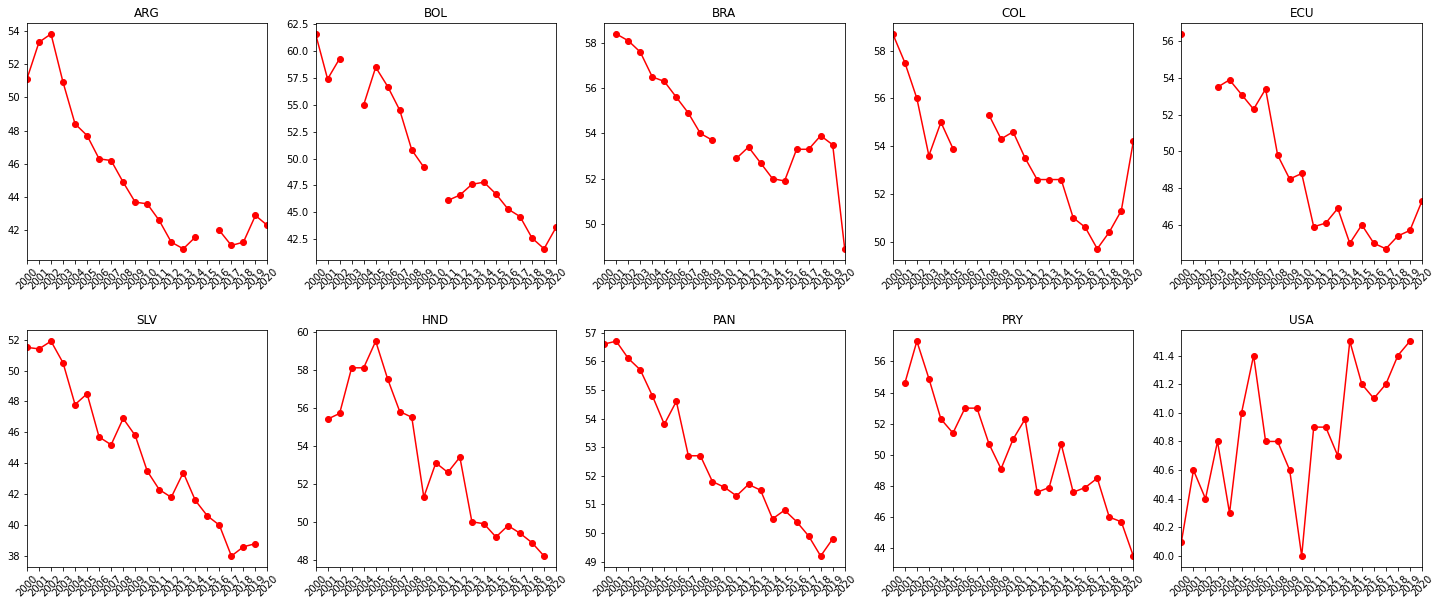

In [7]:
num=0
plt.figure(figsize=(25, 10))
plt.subplots_adjust(hspace=0.3)
for i in paises_nulos1:
    num+=1
    esp=tbl_gini[tbl_gini["Pais_ID"]==i][["Year","GINI"]]
    ax=plt.subplot(2,5,num)
    ax.plot(esp["Year"],esp["GINI"], color="red",marker="o")
    ax.set_title(i)
    plt.xlim("2000","2020")
    plt.xticks(rotation=45)
plt.show()

PARA ESTOS PAISES APLICAREMOS INTERPOLACION

In [8]:
#Vamos a interpolar con el metodo polinomial
for i in paises_nulos1:
    temp = tbl_gini[tbl_gini['Pais_ID'] == i]
    temp = temp.interpolate(method="polynomial", order=3)
    tbl_gini[tbl_gini['Pais_ID'] == i] = temp
#Vamos a interpolar con el metodo lineal para llenar los extremos
for i in paises_nulos1:
    temp = tbl_gini[tbl_gini['Pais_ID'] == i]
    temp = temp.interpolate(method="linear",limit_direction="both")
    tbl_gini[tbl_gini['Pais_ID'] == i] = temp

In [9]:
for i in paises_nulos1:
    print(i,"->",tbl_gini[tbl_gini["Pais_ID"] == i]["GINI"].isnull().sum())

ARG -> 0
BOL -> 0
BRA -> 0
COL -> 0
ECU -> 0
SLV -> 0
HND -> 0
PAN -> 0
PRY -> 0
USA -> 0


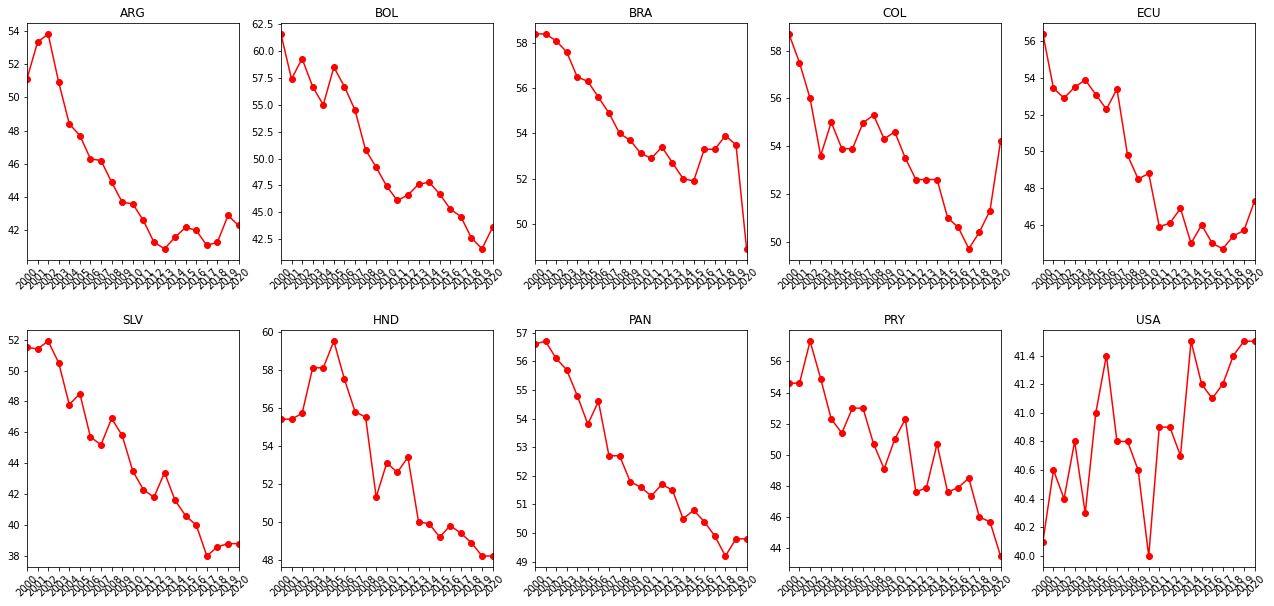

In [10]:
num=0
plt.figure(figsize=(22, 10))
plt.subplots_adjust(hspace=0.3)
for i in paises_nulos1:
    num+=1
    esp=tbl_gini[tbl_gini["Pais_ID"]==i][["Year","GINI"]]
    ax=plt.subplot(2,5,num)
    ax.plot(esp["Year"],esp["GINI"], color="red",marker="o")
    plt.xlim("2000","2020")
    plt.xticks(rotation=45)
    ax.set_title(i)
plt.show()

AHORA NOS ENFOCAREMOS EN LOS PAISES QUE TIENEN ENTRE 6 y 11 (hasta el 50%) de datos faltantes

In [11]:
#Vemos que paises tienen entre 6 y 11 datos nulos
print("Paises con datos nulos: entre 6 y 10")
paises_nulos2=[]
for i in paises:
    suma=tbl_gini[tbl_gini["Pais_ID"] == i]["GINI"].isnull().sum()
    if 11 >= suma >= 6:
        paises_nulos2.append(i)
        print(i, "tiene", suma, "datos faltantes")
print(paises_nulos2)

Paises con datos nulos: entre 6 y 10
CAN tiene 11 datos faltantes
MEX tiene 9 datos faltantes
URY tiene 6 datos faltantes
['CAN', 'MEX', 'URY']


GRAFICAMOS

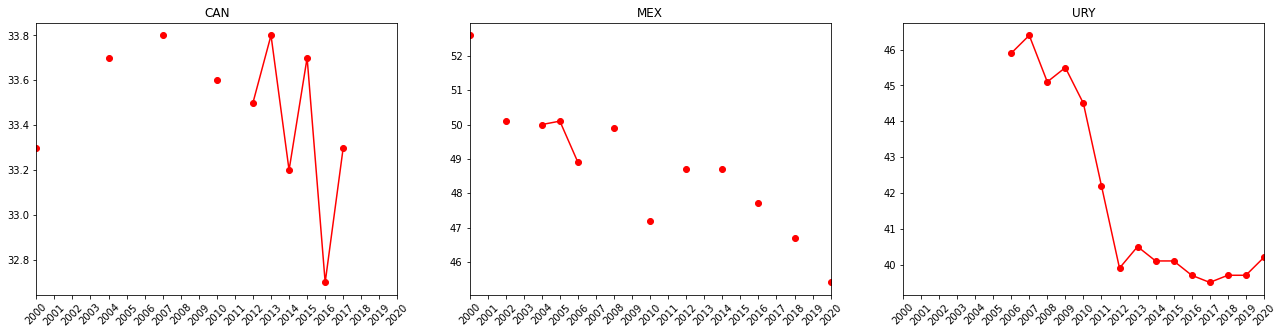

In [12]:
num=0
plt.figure(figsize=(22, 5))
plt.subplots_adjust()
for i in paises_nulos2:
    num+=1
    esp=tbl_gini[tbl_gini["Pais_ID"]==i][["Year","GINI"]]
    ax=plt.subplot(1,3,num)
    ax.plot(esp["Year"],esp["GINI"], color="red", marker="o")
    ax.set_title(i)
    plt.xlim("2000","2020")
    plt.xticks(rotation=45)
    plt.xticks(rotation=45)
plt.show()

VAMOS A ANALIZAR UNO POR UNO<br>
COMENZAREMOS POR URY<br>

Como se observa en la grafica, faltan los valores entre el año 2000 y 2006, usaremos la tendencia de argentina para llenar los datos faltantes

In [13]:
#Vemos los valores para URUGUAY
tbl_gini[tbl_gini["Pais_ID"] == "URY"]

,Pais_ID,Year,GINI
21,URY,2020,40.2
22,URY,2019,39.7
23,URY,2018,39.7
24,URY,2017,39.5
25,URY,2016,39.7
26,URY,2015,40.1
27,URY,2014,40.1
28,URY,2013,40.5
29,URY,2012,39.9
30,URY,2011,42.2


In [14]:
#Calculamos la variacion inter anual comenzando con el año 2006 hacia abajo al año 2000 para ARG y completamos los valores nulos para URY con esa variacion
var_anual=[]
años_v=["2005","2004","2003","2002","2001","2000"]
for i in años_v:
    año_ant=int(i)+1
    año_ant=str(año_ant)
    coef_var=tbl_gini[(tbl_gini["Pais_ID"]=="ARG")&(tbl_gini["Year"] == i)]["GINI"].values[0]/tbl_gini[(tbl_gini["Pais_ID"]=="ARG")&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]
    tbl_gini.loc[((tbl_gini["Pais_ID"]=="URY")&(tbl_gini["Year"] == i)),"GINI"]=coef_var*tbl_gini[(tbl_gini["Pais_ID"]=="URY")&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]

In [15]:
#Vemos el resultado URUGUAY
tbl_gini[tbl_gini["Pais_ID"] == "URY"]

,Pais_ID,Year,GINI
21,URY,2020,40.200000
22,URY,2019,39.700000
23,URY,2018,39.700000
24,URY,2017,39.500000
25,URY,2016,39.700000
26,URY,2015,40.100000
27,URY,2014,40.100000
28,URY,2013,40.500000
29,URY,2012,39.900000
30,URY,2011,42.200000


AHORA NOS ENFOCAREMOS EN MEXICO

In [16]:
#Vemos los valores para MEXICO
tbl_gini[tbl_gini["Pais_ID"] == "MEX"]

,Pais_ID,Year,GINI
273,MEX,2020,45.4
274,MEX,2019,NaN
275,MEX,2018,46.7
276,MEX,2017,NaN
277,MEX,2016,47.7
278,MEX,2015,NaN
279,MEX,2014,48.7
280,MEX,2013,NaN
281,MEX,2012,48.7
282,MEX,2011,NaN


TIENE VALORES FALTANTES CADA UN AÑO, INTERMITENTEMENTE, APLICAREMOS INTERPOLACION POLINOMIAL

In [17]:
#Vamos a interpolar con el metodo polinomial
temp_mex = tbl_gini[tbl_gini['Pais_ID'] == "MEX"]
temp_mex = temp_mex.interpolate(method="polynomial", order=3)
tbl_gini[tbl_gini['Pais_ID'] == "MEX"] = temp_mex

In [18]:
#Vemos el resultado
tbl_gini[tbl_gini["Pais_ID"] == "MEX"]

,Pais_ID,Year,GINI
273,MEX,2020,45.400000
274,MEX,2019,46.116528
275,MEX,2018,46.700000
276,MEX,2017,47.208472
277,MEX,2016,47.700000
278,MEX,2015,48.212084
279,MEX,2014,48.700000
280,MEX,2013,49.018193
281,MEX,2012,48.700000
282,MEX,2011,47.602644


VAMOS A TRABAJAR CON CANADA

In [19]:
#Vemos los valores para CANADA
tbl_gini[tbl_gini["Pais_ID"] == "CAN"]

,Pais_ID,Year,GINI
588,CAN,2020,NaN
589,CAN,2019,NaN
590,CAN,2018,NaN
591,CAN,2017,33.3
592,CAN,2016,32.7
593,CAN,2015,33.7
594,CAN,2014,33.2
595,CAN,2013,33.8
596,CAN,2012,33.5
597,CAN,2011,NaN


TIENE VALORES FALTANTES INTERMEDIOS Y EN UN EXTREMO, APLICAREMOS INTERPOLACION POLINOMIAL EN PRIMER LUGAR

In [20]:
#Vamos a interpolar con el metodo Lineal para llenar los "huecos"
temp_can = tbl_gini[tbl_gini['Pais_ID'] == "CAN"]
temp_can = temp_can.interpolate(method="linear",limit_direction="forward")
tbl_gini[tbl_gini['Pais_ID'] == "CAN"] = temp_can
#Vemos el resultado para CANADA
tbl_gini[tbl_gini["Pais_ID"] == "CAN"]

,Pais_ID,Year,GINI
588,CAN,2020,NaN
589,CAN,2019,NaN
590,CAN,2018,NaN
591,CAN,2017,33.300000
592,CAN,2016,32.700000
593,CAN,2015,33.700000
594,CAN,2014,33.200000
595,CAN,2013,33.800000
596,CAN,2012,33.500000
597,CAN,2011,33.550000


Para completar los valores restantes, calcularemos la media movil de 7 años(para llenar los NaN) y luego aplicaremos los primeros tres valores a la tabla.

In [21]:
med_can=(tbl_gini[(tbl_gini["Pais_ID"]=="CAN")]["GINI"].rolling(7, min_periods=1, center=True).mean()).reset_index()
tbl_gini.loc[(tbl_gini["Pais_ID"]=="CAN")&(tbl_gini["Year"]=="2020"),"GINI"]= med_can.loc[0,"GINI"]
tbl_gini.loc[(tbl_gini["Pais_ID"]=="CAN")&(tbl_gini["Year"]=="2019"),"GINI"]= med_can.loc[1,"GINI"]
tbl_gini.loc[(tbl_gini["Pais_ID"]=="CAN")&(tbl_gini["Year"]=="2018"),"GINI"]= med_can.loc[2,"GINI"]

In [22]:
#Vemos el resultado
tbl_gini[tbl_gini["Pais_ID"] == "CAN"]

,Pais_ID,Year,GINI
588,CAN,2020,33.300000
589,CAN,2019,33.000000
590,CAN,2018,33.233333
591,CAN,2017,33.300000
592,CAN,2016,32.700000
593,CAN,2015,33.700000
594,CAN,2014,33.200000
595,CAN,2013,33.800000
596,CAN,2012,33.500000
597,CAN,2011,33.550000


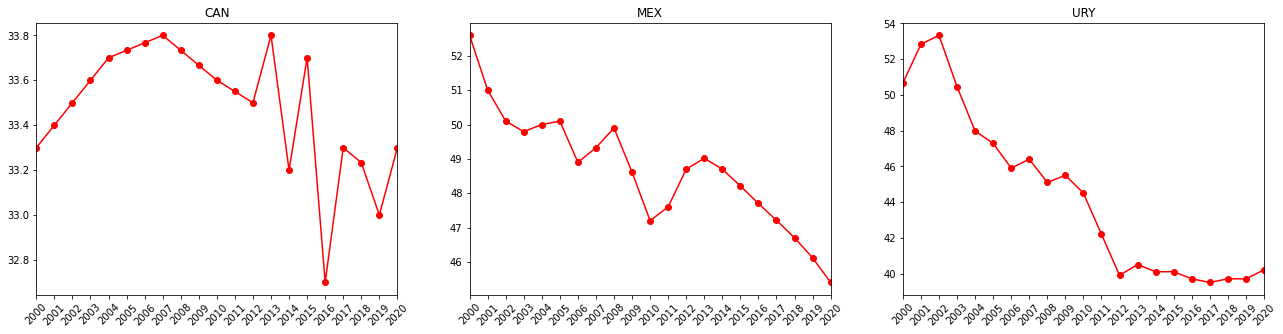

In [23]:
#GRAFICAMOS
num=0
plt.figure(figsize=(22, 5))
plt.subplots_adjust()
for i in paises_nulos2:
    num+=1
    esp=tbl_gini[tbl_gini["Pais_ID"]==i][["Year","GINI"]]
    ax=plt.subplot(1,3,num)
    ax.plot(esp["Year"],esp["GINI"], color="red", marker="o")
    ax.set_title(i)
    plt.xlim("2000","2020")
    plt.xticks(rotation=45)
    plt.xticks(rotation=45)
plt.show()

AHORA NOS ENFOCAREMOS EN LOS PAISES QUE TIENEN ENTRE 12 Y 18 DATOS FALTANTES

In [24]:
#Vemos que paises tienen entre 12 y 18 datos nulos
print("Paises con datos nulos: entre 12 y 20")
paises_nulos3=[]
for i in paises:
    suma=tbl_gini[tbl_gini["Pais_ID"] == i]["GINI"].isnull().sum()
    if 18 >= suma >= 12:
        paises_nulos3.append(i)
        print(i, "tiene", suma, "datos faltantes")
print(paises_nulos3)

Paises con datos nulos: entre 12 y 20
CHL tiene 12 datos faltantes
GTM tiene 18 datos faltantes
NIC tiene 17 datos faltantes
VEN tiene 15 datos faltantes
['CHL', 'GTM', 'NIC', 'VEN']


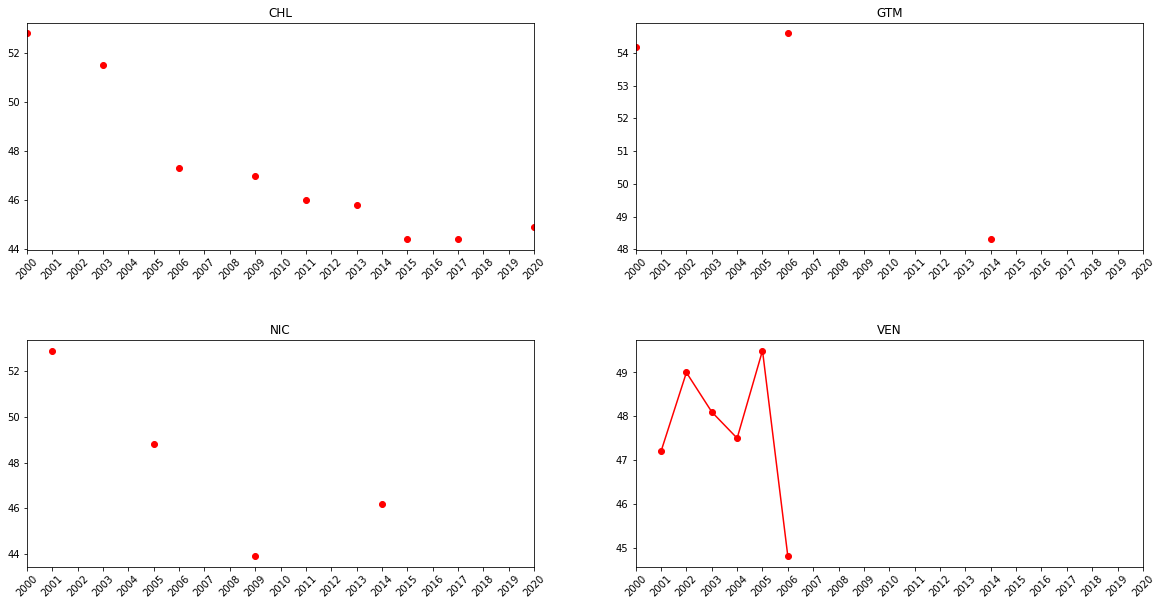

In [25]:
#GRAFICAMOS
num=0
plt.figure(figsize=(20, 10))
plt.subplots_adjust(hspace=0.4)
for i in paises_nulos3:
    num+=1
    esp=tbl_gini[tbl_gini["Pais_ID"]==i][["Year","GINI"]]
    ax=plt.subplot(2,2,num)
    ax.plot(esp["Year"],esp["GINI"], color="red", marker="o")
    ax.set_title(i)
    plt.xlim("2000","2020")
    plt.xticks(rotation=45)
plt.show()

PARA CHILE SE PUEDE APLICAR INTERPOLACION

In [26]:
tbl_gini[tbl_gini["Pais_ID"] == "CHL"]

,Pais_ID,Year,GINI
567,CHL,2020,44.9
568,CHL,2019,NaN
569,CHL,2018,NaN
570,CHL,2017,44.4
571,CHL,2016,NaN
572,CHL,2015,44.4
573,CHL,2014,NaN
574,CHL,2013,45.8
575,CHL,2012,NaN
576,CHL,2011,46.0


In [27]:
#Vamos a interpolar con el metodo Lineal para llenar los "huecos"
temp_chl = tbl_gini[tbl_gini['Pais_ID'] == "CHL"]
temp_chl = temp_chl.interpolate(method="linear",limit_direction="both")
tbl_gini[tbl_gini['Pais_ID'] == "CHL"] = temp_chl
tbl_gini[tbl_gini["Pais_ID"] == "CHL"]

,Pais_ID,Year,GINI
567,CHL,2020,44.900000
568,CHL,2019,44.733333
569,CHL,2018,44.566667
570,CHL,2017,44.400000
571,CHL,2016,44.400000
572,CHL,2015,44.400000
573,CHL,2014,45.100000
574,CHL,2013,45.800000
575,CHL,2012,45.900000
576,CHL,2011,46.000000


LOS DATOS ESTAN MUY SEPARADOS PARA HACER CORRELACION LINEAL EN NICARAGUA Y GUATEMALA<br>
PARA COMPLETAR NICARAGUA Y GUATEMALA UTILIZAREMOS COMO REFERENCIA LA VARIACION DE HONDURAS

GUATEMALA

In [28]:
tbl_gini[tbl_gini["Pais_ID"] == "GTM"]

,Pais_ID,Year,GINI
378,GTM,2020,NaN
379,GTM,2019,NaN
380,GTM,2018,NaN
381,GTM,2017,NaN
382,GTM,2016,NaN
383,GTM,2015,NaN
384,GTM,2014,48.3
385,GTM,2013,NaN
386,GTM,2012,NaN
387,GTM,2011,NaN


In [29]:
#GUATEMALA
#Completaremos las valores faltantes SOLO de los valores NaN, usando de referencia la variacion de Honduras
var_anual=[]
años_v=["2001","2002","2003","2004","2005","2007","2008","2009","2010","2011","2012","2013","2015","2016","2017","2018","2019","2020"]
for i in años_v:
    año_ant=int(i)-1
    año_ant=str(año_ant)
    coef_var=tbl_gini[(tbl_gini["Pais_ID"]=="HND")&(tbl_gini["Year"] == i)]["GINI"].values[0]/tbl_gini[(tbl_gini["Pais_ID"]=="HND")&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]
    tbl_gini.loc[((tbl_gini["Pais_ID"]=="GTM")&(tbl_gini["Year"] == i)),"GINI"]=coef_var*tbl_gini[(tbl_gini["Pais_ID"]=="GTM")&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]
tbl_gini[tbl_gini["Pais_ID"] == "GTM"]

,Pais_ID,Year,GINI
378,GTM,2020,46.654509
379,GTM,2019,46.654509
380,GTM,2018,47.332064
381,GTM,2017,47.816032
382,GTM,2016,48.203206
383,GTM,2015,47.622445
384,GTM,2014,48.300000
385,GTM,2013,47.478261
386,GTM,2012,50.706783
387,GTM,2011,49.947130


NICARAGUA

In [30]:
tbl_gini[tbl_gini["Pais_ID"] == "NIC"]

,Pais_ID,Year,GINI
252,NIC,2020,NaN
253,NIC,2019,NaN
254,NIC,2018,NaN
255,NIC,2017,NaN
256,NIC,2016,NaN
257,NIC,2015,NaN
258,NIC,2014,46.2
259,NIC,2013,NaN
260,NIC,2012,NaN
261,NIC,2011,NaN


In [31]:
#NICARAGUA
#Completaremos las valores faltantes SOLO de los valores NaN, usando de referencia la variacion de Honduras, nos quedará el año 2000, que completaremos luego
var_anual=[]
años_v=["2002","2003","2004","2006","2007","2008","2010","2011","2012","2013","2015","2016","2017","2018","2019","2020"]
for i in años_v:
    año_ant=int(i)-1
    año_ant=str(año_ant)
    coef_var=tbl_gini[(tbl_gini["Pais_ID"]=="HND")&(tbl_gini["Year"] == i)]["GINI"].values[0]/tbl_gini[(tbl_gini["Pais_ID"]=="HND")&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]
    tbl_gini.loc[((tbl_gini["Pais_ID"]=="NIC")&(tbl_gini["Year"] == i)),"GINI"]=coef_var*tbl_gini[(tbl_gini["Pais_ID"]=="NIC")&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]
#Completamos el año 2000
coef_var=tbl_gini[(tbl_gini["Pais_ID"]=="HND")&(tbl_gini["Year"] == "2001")]["GINI"].values[0]/tbl_gini[(tbl_gini["Pais_ID"]=="HND")&(tbl_gini["Year"] == "2000")]["GINI"].values[0]
tbl_gini.loc[((tbl_gini["Pais_ID"]=="NIC")&(tbl_gini["Year"] == "2000")),"GINI"]=coef_var*tbl_gini[(tbl_gini["Pais_ID"]=="NIC")&(tbl_gini["Year"] == "2001")]["GINI"].values[0]
tbl_gini[tbl_gini["Pais_ID"] == "NIC"]

,Pais_ID,Year,GINI
252,NIC,2020,44.626052
253,NIC,2019,44.626052
254,NIC,2018,45.274148
255,NIC,2017,45.737074
256,NIC,2016,46.107415
257,NIC,2015,45.551904
258,NIC,2014,46.200000
259,NIC,2013,42.787524
260,NIC,2012,45.697076
261,NIC,2011,45.012476


PARA COMPLETAR VENEZUELA USAREMOS COMO REFERENCIA LA VARIACION DE COLOMBIA

In [32]:
tbl_gini[tbl_gini["Pais_ID"] == "VEN"]

,Pais_ID,Year,GINI
0,VEN,2020,NaN
1,VEN,2019,NaN
2,VEN,2018,NaN
3,VEN,2017,NaN
4,VEN,2016,NaN
5,VEN,2015,NaN
6,VEN,2014,NaN
7,VEN,2013,NaN
8,VEN,2012,NaN
9,VEN,2011,NaN


In [33]:
#VENEZUELA
#Completaremos las valores faltantes SOLO de los valores NaN, usando de referencia la variacion de Colombia, nos quedará el año 2000, que completaremos luego
var_anual=[]
años_v=["2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"]
for i in años_v:
    año_ant=int(i)-1
    año_ant=str(año_ant)
    coef_var=tbl_gini[(tbl_gini["Pais_ID"]=="COL")&(tbl_gini["Year"] == i)]["GINI"].values[0]/tbl_gini[(tbl_gini["Pais_ID"]=="COL")&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]
    tbl_gini.loc[((tbl_gini["Pais_ID"]=="VEN")&(tbl_gini["Year"] == i)),"GINI"]=coef_var*tbl_gini[(tbl_gini["Pais_ID"]=="VEN")&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]
#Completamos el año 2000
coef_var=tbl_gini[(tbl_gini["Pais_ID"]=="COL")&(tbl_gini["Year"] == "2001")]["GINI"].values[0]/tbl_gini[(tbl_gini["Pais_ID"]=="COL")&(tbl_gini["Year"] == "2000")]["GINI"].values[0]
tbl_gini.loc[((tbl_gini["Pais_ID"]=="VEN")&(tbl_gini["Year"] == "2000")),"GINI"]=coef_var*tbl_gini[(tbl_gini["Pais_ID"]=="VEN")&(tbl_gini["Year"] == "2001")]["GINI"].values[0]
tbl_gini[tbl_gini["Pais_ID"] == "VEN"]

,Pais_ID,Year,GINI
0,VEN,2020,45.062535
1,VEN,2019,42.651440
2,VEN,2018,41.903169
3,VEN,2017,41.321181
4,VEN,2016,42.069451
5,VEN,2015,42.402016
6,VEN,2014,43.732276
7,VEN,2013,43.732276
8,VEN,2012,43.732276
9,VEN,2011,44.480547


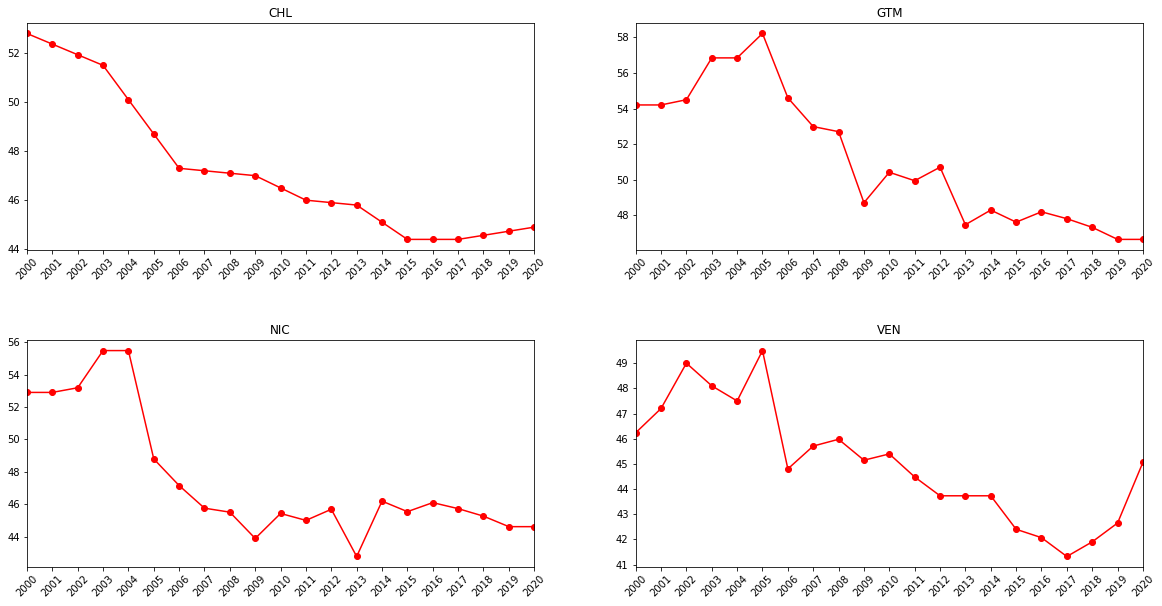

In [34]:
#GRAFICAMOS
num=0
plt.figure(figsize=(20, 10))
plt.subplots_adjust(hspace=0.4)
for i in paises_nulos3:
    num+=1
    esp=tbl_gini[tbl_gini["Pais_ID"]==i][["Year","GINI"]]
    ax=plt.subplot(2,2,num)
    ax.plot(esp["Year"],esp["GINI"], color="red", marker="o")
    ax.set_title(i)
    plt.xlim("2000","2020")
    plt.xticks(rotation=45)
plt.show()

## POR ULTIMO NOS QUEDAN LOS PAISES CON UN DATO, DOS, O NINGUNO

In [35]:
#Vemos que paises tienen 0, 1 o 2 datos
print("Paises con datos nulos: entre 19 y 21")
paises_nulos4=[]
for i in paises:
    suma=tbl_gini[tbl_gini["Pais_ID"] == i]["GINI"].isnull().sum()
    if 21 >= suma >= 19:
        paises_nulos4.append(i)
        print(i, "tiene", suma, "datos faltantes")
print(paises_nulos4)

Paises con datos nulos: entre 19 y 21
ATG tiene 21 datos faltantes
BRB tiene 21 datos faltantes
BLZ tiene 21 datos faltantes
CUB tiene 21 datos faltantes
DMA tiene 21 datos faltantes
GRD tiene 21 datos faltantes
GUY tiene 21 datos faltantes
HTI tiene 20 datos faltantes
JAM tiene 19 datos faltantes
KNA tiene 21 datos faltantes
LCA tiene 20 datos faltantes
VCT tiene 21 datos faltantes
SUR tiene 21 datos faltantes
BHS tiene 21 datos faltantes
TTO tiene 21 datos faltantes
['ATG', 'BRB', 'BLZ', 'CUB', 'DMA', 'GRD', 'GUY', 'HTI', 'JAM', 'KNA', 'LCA', 'VCT', 'SUR', 'BHS', 'TTO']


## Podemos dividir los paises en grupos:<br>

### Islas del caribe<br>
ATG: Antigua y Barbuda -- Indice GINI 2015: 53.00 segun paper cepal (https://www.cepal.org/sites/default/files/events/files/egm_ppt.pdf)<br>
BRB: Barbados -- Indice GINI 2015: 39.00 segun paper cepal (https://www.cepal.org/sites/default/files/events/files/egm_ppt.pdf)<br>
DMA: Dominica -- Indice GINI 2015: 49.00 segun paper cepal (https://www.cepal.org/sites/default/files/events/files/egm_ppt.pdf)<br>
GRD: Granada -- Indice GINI 2015: 45.00 segun paper cepal (https://www.cepal.org/sites/default/files/events/files/egm_ppt.pdf)<br>
KNA: St. Kitts and Nevis -- Indice GINI 2015: 40.00 segun paper cepal (https://www.cepal.org/sites/default/files/events/files/egm_ppt.pdf)<br>
VCT: St. Vincent and the Grenadines -- Indice GINI 2015: 56.00 segun paper cepal (https://www.cepal.org/sites/default/files/events/files/egm_ppt.pdf)<br>
BHS: Bahamas -- el indice GINI del año 2009 fue de 44.00 (fuente: https://www.paho.org/hq/dmdocuments/2012/2012-sa-bahamas.pdf)<br>
LCA: Santa Lucia -- La tabla tiene un dato de referencia<br>
CUB: Cuba -- el indice GINI del año 2017 fue de 40.7 (fuente: https://elestadocomotal.com/2017/04/29/desigualdad-global-como-se-ubica-cuba/#:~:text=Por%20otra%20parte%2C%20si%20se,en%20la%20distribuci%C3%B3n%20del%20ingreso.)<br>
JAM: Jamaica -- La tabal tiene dos datos de referencia  -- Indice GINI 2015: 38.00 segun paper cepal (https://www.cepal.org/sites/default/files/events/files/egm_ppt.pdf)<br>
HTI: Haiti -- La tabla tine un dato de referencia<br>

El unico pais que podemos usar de referencia es Republica Dominicana<br>

### Centro América:<br>
BLZ: Belize -- el indice gini para el año 1999 fue de 53.3, segun fuente:  "https://worldpopulationreview.com/country-rankings/gini-coefficient-by-country"<br>
 -- Indice GINI 2015: 51.00 segun paper cepal (https://www.cepal.org/sites/default/files/events/files/egm_ppt.pdf)<br>
Lo podemos comparar con Guatemala<br>

### Costa Norte de Sud America:<br>
TTO: Trinidad y Tobago -- el indice Gini para Trinidad y Tobago en 1992 fue de 40.3 (fuente: https://datosmacro.expansion.com/demografia/indice-gini/trinidad-tobago)<br>
     -- Indice GINI 2015: 30.00 segun paper cepal (https://www.cepal.org/sites/default/files/events/files/egm_ppt.pdf)<br>
GUY: Guyana -- el indice Gini para Guyana en 1998 fue de 45.1 (fuente: https://datosmacro.expansion.com/demografia/indice-gini/guyana)<br>
     -- Indice GINI 2015: 45.00 segun paper cepal (https://www.cepal.org/sites/default/files/events/files/egm_ppt.pdf)<br>
SUR: Suriname -- el indice Gini para Suriname en 1999 fue de 57.9 (fuente:https://datosmacro.expansion.com/demografia/indice-gini/surinam)<br>
Ademas encontramos que para 2015 fue de 53.07, 2014 de 53.6, 2013 de 52.53 y 2012 de 52.49 (fuente: https://datosmacro.expansion.com/estado/indice-competitividad-global/surinam)<br>
Usaremos VENEZUELA DE REFERENCIA

### EN PRIMER LUGAR VAMOS A IMPUTAR LOS VALORES DE REFERENCIA ENCONTRADOS

In [36]:
#IMPUTAMOS LOS VALORES ENCONTRADOS
tbl_gini.loc[(tbl_gini["Pais_ID"] == "ATG")&(tbl_gini["Year"] == "2015"),"GINI"]=53.00
tbl_gini.loc[(tbl_gini["Pais_ID"] == "BRB")&(tbl_gini["Year"] == "2015"),"GINI"]=39.00
tbl_gini.loc[(tbl_gini["Pais_ID"] == "DMA")&(tbl_gini["Year"] == "2015"),"GINI"]=49.00
tbl_gini.loc[(tbl_gini["Pais_ID"] == "GRD")&(tbl_gini["Year"] == "2015"),"GINI"]=45.00
tbl_gini.loc[(tbl_gini["Pais_ID"] == "KNA")&(tbl_gini["Year"] == "2015"),"GINI"]=40.00
tbl_gini.loc[(tbl_gini["Pais_ID"] == "VCT")&(tbl_gini["Year"] == "2015"),"GINI"]=56.00
tbl_gini.loc[(tbl_gini["Pais_ID"] == "BHS")&(tbl_gini["Year"] == "2009"),"GINI"]=44.00
tbl_gini.loc[(tbl_gini["Pais_ID"] == "CUB")&(tbl_gini["Year"] == "2017"),"GINI"]=40.70
tbl_gini.loc[(tbl_gini["Pais_ID"] == "JAM")&(tbl_gini["Year"] == "2015"),"GINI"]=38.00
tbl_gini.loc[(tbl_gini["Pais_ID"] == "BLZ")&(tbl_gini["Year"] == "2000"),"GINI"]=53.30
tbl_gini.loc[(tbl_gini["Pais_ID"] == "BLZ")&(tbl_gini["Year"] == "2015"),"GINI"]=51.00
tbl_gini.loc[(tbl_gini["Pais_ID"] == "TTO")&(tbl_gini["Year"] == "2000"),"GINI"]=40.30
tbl_gini.loc[(tbl_gini["Pais_ID"] == "TTO")&(tbl_gini["Year"] == "2015"),"GINI"]=30.00
tbl_gini.loc[(tbl_gini["Pais_ID"] == "GUY")&(tbl_gini["Year"] == "2000"),"GINI"]=45.10
tbl_gini.loc[(tbl_gini["Pais_ID"] == "GUY")&(tbl_gini["Year"] == "2015"),"GINI"]=45.00
tbl_gini.loc[(tbl_gini["Pais_ID"] == "SUR")&(tbl_gini["Year"] == "2000"),"GINI"]=57.9
tbl_gini.loc[(tbl_gini["Pais_ID"] == "SUR")&(tbl_gini["Year"] == "2015"),"GINI"]=53.07
tbl_gini.loc[(tbl_gini["Pais_ID"] == "SUR")&(tbl_gini["Year"] == "2014"),"GINI"]=53.6
tbl_gini.loc[(tbl_gini["Pais_ID"] == "SUR")&(tbl_gini["Year"] == "2013"),"GINI"]=52.53
tbl_gini.loc[(tbl_gini["Pais_ID"] == "SUR")&(tbl_gini["Year"] == "2012"),"GINI"]=52.49

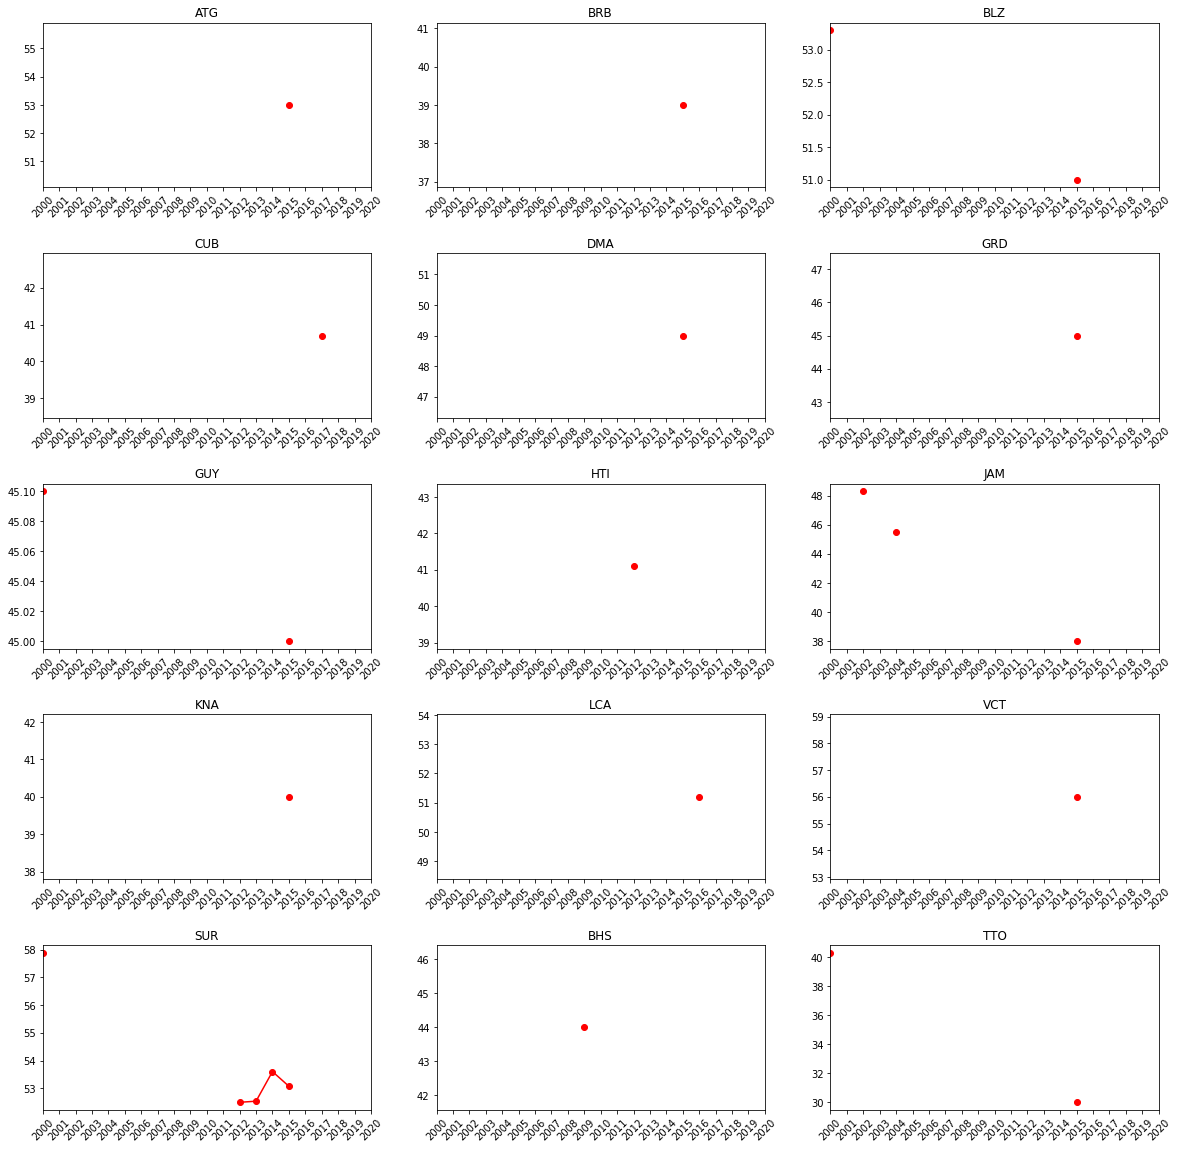

In [37]:
#GRAFICAMOS
num=0
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.4)
for i in paises_nulos4:
    num+=1
    esp=tbl_gini[tbl_gini["Pais_ID"]==i][["Year","GINI"]]
    ax=plt.subplot(5,3,num)
    ax.plot(esp["Year"],esp["GINI"], color="red", marker="o")
    ax.set_title(i)
    plt.xlim("2000","2020")
    plt.xticks(rotation=45)
plt.show()

VAMOS A COMPLETAR, ATG, BRB, DMA, GRD, KNA Y VCT. SOLO TIENEN UN DATO EN 2015. LA VARIACION SERÁ RESPECTO A "DOM"

In [38]:
#ATG, BRB, DMA, GRD, KNA Y VCT
#Completaremos las valores faltantes SOLO de los valores NaN, usando de referencia la variacion de Rep Dominicana del año 2016 al 2020
años_v=["2016","2017","2018","2019","2020"]
paises_car1=["ATG", "BRB", "DMA", "GRD", "KNA", "VCT"]
for e in paises_car1:
    for i in años_v:
        año_ant=int(i)-1
        año_ant=str(año_ant)
        coef_var=tbl_gini[(tbl_gini["Pais_ID"]=="DOM")&(tbl_gini["Year"] == i)]["GINI"].values[0]/tbl_gini[(tbl_gini["Pais_ID"]=="DOM")&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]
        tbl_gini.loc[((tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == i)),"GINI"]=coef_var*tbl_gini[(tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]
#Completaremos las valores faltantes SOLO de los valores NaN, usando de referencia la variacion de Rep Dominicana del año 2014 al 2000
años_v=["2014","2013","2012","2011","2010","2009","2008","2007","2006","2005","2004","2003","2002","2001","2000"]
paises_car1=["ATG", "BRB", "DMA", "GRD", "KNA", "VCT"]
for e in paises_car1:
    for i in años_v:
        año_ant=int(i)+1
        año_ant=str(año_ant)
        coef_var=tbl_gini[(tbl_gini["Pais_ID"]=="DOM")&(tbl_gini["Year"] == i)]["GINI"].values[0]/tbl_gini[(tbl_gini["Pais_ID"]=="DOM")&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]
        tbl_gini.loc[((tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == i)),"GINI"]=coef_var*tbl_gini[(tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]

CUBA TIENE UN SOLO DATA EN 2017, COMPLETAREMOS EL RESTO

In [39]:
#Completaremos las valores faltantes SOLO de los valores NaN, usando de referencia la variacion de Rep Dominicana del año 2018 al 2020
años_v=["2018","2019","2020"]
paises_car1=["CUB"]
for e in paises_car1:
    for i in años_v:
        año_ant=int(i)-1
        año_ant=str(año_ant)
        coef_var=tbl_gini[(tbl_gini["Pais_ID"]=="DOM")&(tbl_gini["Year"] == i)]["GINI"].values[0]/tbl_gini[(tbl_gini["Pais_ID"]=="DOM")&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]
        tbl_gini.loc[((tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == i)),"GINI"]=coef_var*tbl_gini[(tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]
#Completaremos las valores faltantes SOLO de los valores NaN, usando de referencia la variacion de Rep Dominicana del año 2016 al 2000
años_v=["2016","2015","2014","2013","2012","2011","2010","2009","2008","2007","2006","2005","2004","2003","2002","2001","2000"]
paises_car1=["CUB"]
for e in paises_car1:
    for i in años_v:
        año_ant=int(i)+1
        año_ant=str(año_ant)
        coef_var=tbl_gini[(tbl_gini["Pais_ID"]=="DOM")&(tbl_gini["Year"] == i)]["GINI"].values[0]/tbl_gini[(tbl_gini["Pais_ID"]=="DOM")&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]
        tbl_gini.loc[((tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == i)),"GINI"]=coef_var*tbl_gini[(tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]

HAITI TIENE UN SOLO DATO EN 2012, COMPLETAREMOS EL RESTO

In [40]:
#Completaremos las valores faltantes SOLO de los valores NaN, usando de referencia la variacion de Rep Dominicana del año 2013 al 2020
años_v=["2013","2014","2015","2016","2017","2018","2019","2020"]
paises_car1=["HTI"]
for e in paises_car1:
    for i in años_v:
        año_ant=int(i)-1
        año_ant=str(año_ant)
        coef_var=tbl_gini[(tbl_gini["Pais_ID"]=="DOM")&(tbl_gini["Year"] == i)]["GINI"].values[0]/tbl_gini[(tbl_gini["Pais_ID"]=="DOM")&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]
        tbl_gini.loc[((tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == i)),"GINI"]=coef_var*tbl_gini[(tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]
#Completaremos las valores faltantes SOLO de los valores NaN, usando de referencia la variacion de Rep Dominicana del año 2011 al 2000
años_v=["2011","2010","2009","2008","2007","2006","2005","2004","2003","2002","2001","2000"]
paises_car1=["HTI"]
for e in paises_car1:
    for i in años_v:
        año_ant=int(i)+1
        año_ant=str(año_ant)
        coef_var=tbl_gini[(tbl_gini["Pais_ID"]=="DOM")&(tbl_gini["Year"] == i)]["GINI"].values[0]/tbl_gini[(tbl_gini["Pais_ID"]=="DOM")&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]
        tbl_gini.loc[((tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == i)),"GINI"]=coef_var*tbl_gini[(tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]

SANTA LUCIA TIENE UN DATO EN 2016, COMPLETAREMOS EL RESTO

In [41]:
#Completaremos las valores faltantes SOLO de los valores NaN, usando de referencia la variacion de Rep Dominicana del año 2017 al 2020
años_v=["2017","2018","2019","2020"]
paises_car1=["LCA"]
for e in paises_car1:
    for i in años_v:
        año_ant=int(i)-1
        año_ant=str(año_ant)
        coef_var=tbl_gini[(tbl_gini["Pais_ID"]=="DOM")&(tbl_gini["Year"] == i)]["GINI"].values[0]/tbl_gini[(tbl_gini["Pais_ID"]=="DOM")&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]
        tbl_gini.loc[((tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == i)),"GINI"]=coef_var*tbl_gini[(tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]
#Completaremos las valores faltantes SOLO de los valores NaN, usando de referencia la variacion de Rep Dominicana del año 2015 al 2000
años_v=["2015","2014","2013","2012","2011","2010","2009","2008","2007","2006","2005","2004","2003","2002","2001","2000"]
paises_car1=["LCA"]
for e in paises_car1:
    for i in años_v:
        año_ant=int(i)+1
        año_ant=str(año_ant)
        coef_var=tbl_gini[(tbl_gini["Pais_ID"]=="DOM")&(tbl_gini["Year"] == i)]["GINI"].values[0]/tbl_gini[(tbl_gini["Pais_ID"]=="DOM")&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]
        tbl_gini.loc[((tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == i)),"GINI"]=coef_var*tbl_gini[(tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]

JAMAICA TIENE DATOS PARA EL 2002, 2004 y 2015, COMPLETAREMOS EL RESTO

In [42]:
#Completaremos las valores faltantes SOLO de los valores NaN, usando de referencia la variacion de Rep Dominicana del año 2016 al 2020
años_v=["2016","2017","2018","2019","2020"]
paises_car1=["JAM"]
for e in paises_car1:
    for i in años_v:
        año_ant=int(i)-1
        año_ant=str(año_ant)
        coef_var=tbl_gini[(tbl_gini["Pais_ID"]=="DOM")&(tbl_gini["Year"] == i)]["GINI"].values[0]/tbl_gini[(tbl_gini["Pais_ID"]=="DOM")&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]
        tbl_gini.loc[((tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == i)),"GINI"]=coef_var*tbl_gini[(tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]
#Completaremos las valores faltantes SOLO de los valores NaN, usando de referencia la variacion de Rep Dominicana del año 2014 al 2000, salteando 2002 y 2004
años_v=["2014","2013","2012","2011","2010","2009","2008","2007","2006","2005","2003","2001","2000"]
paises_car1=["JAM"]
for e in paises_car1:
    for i in años_v:
        año_ant=int(i)+1
        año_ant=str(año_ant)
        coef_var=tbl_gini[(tbl_gini["Pais_ID"]=="DOM")&(tbl_gini["Year"] == i)]["GINI"].values[0]/tbl_gini[(tbl_gini["Pais_ID"]=="DOM")&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]
        tbl_gini.loc[((tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == i)),"GINI"]=coef_var*tbl_gini[(tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]

BAHAMAS TIENE UN DATO PARA EL 2009, COMPLETAREMOS EL RESTO

In [43]:
#Completaremos las valores faltantes SOLO de los valores NaN, usando de referencia la variacion de Rep Dominicana del año 2010 al 2020
años_v=["2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"]
paises_car1=["BHS"]
for e in paises_car1:
    for i in años_v:
        año_ant=int(i)-1
        año_ant=str(año_ant)
        coef_var=tbl_gini[(tbl_gini["Pais_ID"]=="DOM")&(tbl_gini["Year"] == i)]["GINI"].values[0]/tbl_gini[(tbl_gini["Pais_ID"]=="DOM")&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]
        tbl_gini.loc[((tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == i)),"GINI"]=coef_var*tbl_gini[(tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]
#Completaremos las valores faltantes SOLO de los valores NaN, usando de referencia la variacion de Rep Dominicana del año 2008 al 2000
años_v=["2008","2007","2006","2005","2004","2003","2002","2001","2000"]
paises_car1=["BHS"]
for e in paises_car1:
    for i in años_v:
        año_ant=int(i)+1
        año_ant=str(año_ant)
        coef_var=tbl_gini[(tbl_gini["Pais_ID"]=="DOM")&(tbl_gini["Year"] == i)]["GINI"].values[0]/tbl_gini[(tbl_gini["Pais_ID"]=="DOM")&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]
        tbl_gini.loc[((tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == i)),"GINI"]=coef_var*tbl_gini[(tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]

GUYANA y TRINIDAD Y TOBAGO TIENEN DATOS DEL 2000 y 2015, COMPLETAREMOS EL RESTO USANDO VENEZUELA DE REFERENCIA

In [44]:
#Completaremos las valores faltantes SOLO de los valores NaN, usando de referencia la variacion de Venezuela del año 2016 al 2020
años_v=["2016","2017","2018","2019","2020"]
paises_car1=["GUY","TTO"]
for e in paises_car1:
    for i in años_v:
        año_ant=int(i)-1
        año_ant=str(año_ant)
        coef_var=tbl_gini[(tbl_gini["Pais_ID"]=="VEN")&(tbl_gini["Year"] == i)]["GINI"].values[0]/tbl_gini[(tbl_gini["Pais_ID"]=="VEN")&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]
        tbl_gini.loc[((tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == i)),"GINI"]=coef_var*tbl_gini[(tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]
#Completaremos las valores faltantes SOLO de los valores NaN, usando de referencia la variacion de Venezuel del año 2014 al 2001
años_v=["2014","2013","2012","2011","2010","2009","2008","2007","2006","2005","2004","2003","2002","2001"]
paises_car1=["GUY","TTO"]
for e in paises_car1:
    for i in años_v:
        año_ant=int(i)+1
        año_ant=str(año_ant)
        coef_var=tbl_gini[(tbl_gini["Pais_ID"]=="VEN")&(tbl_gini["Year"] == i)]["GINI"].values[0]/tbl_gini[(tbl_gini["Pais_ID"]=="VEN")&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]
        tbl_gini.loc[((tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == i)),"GINI"]=coef_var*tbl_gini[(tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]

SURINAME TIENE DATOS DEL 2000 y DEL 2012 AL 2015, completaremos el resto usando venezuela como referencia

In [45]:
#Completaremos las valores faltantes SOLO de los valores NaN, usando de referencia la variacion de Venezuela del año 2016 al 2020
años_v=["2016","2017","2018","2019","2020"]
paises_car1=["SUR"]
for e in paises_car1:
    for i in años_v:
        año_ant=int(i)-1
        año_ant=str(año_ant)
        coef_var=tbl_gini[(tbl_gini["Pais_ID"]=="VEN")&(tbl_gini["Year"] == i)]["GINI"].values[0]/tbl_gini[(tbl_gini["Pais_ID"]=="VEN")&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]
        tbl_gini.loc[((tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == i)),"GINI"]=coef_var*tbl_gini[(tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]
#Completaremos las valores faltantes SOLO de los valores NaN, usando de referencia la variacion de Venezuel del año 2011 al 2001
años_v=["2011","2010","2009","2008","2007","2006","2005","2004","2003","2002","2001"]
paises_car1=["SUR"]
for e in paises_car1:
    for i in años_v:
        año_ant=int(i)+1
        año_ant=str(año_ant)
        coef_var=tbl_gini[(tbl_gini["Pais_ID"]=="VEN")&(tbl_gini["Year"] == i)]["GINI"].values[0]/tbl_gini[(tbl_gini["Pais_ID"]=="VEN")&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]
        tbl_gini.loc[((tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == i)),"GINI"]=coef_var*tbl_gini[(tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]

PARA BELIZE TENEMOS DATOS DEL 2000 y 2015, COMPLETAREMOS EL RESTO USANDO GUATEMALA DE REFERENCIA

In [46]:
#Completaremos las valores faltantes SOLO de los valores NaN, usando de referencia la variacion de Guatemala del año 2016 al 2020
años_v=["2016","2017","2018","2019","2020"]
paises_car1=["BLZ"]
for e in paises_car1:
    for i in años_v:
        año_ant=int(i)-1
        año_ant=str(año_ant)
        coef_var=tbl_gini[(tbl_gini["Pais_ID"]=="GTM")&(tbl_gini["Year"] == i)]["GINI"].values[0]/tbl_gini[(tbl_gini["Pais_ID"]=="GTM")&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]
        tbl_gini.loc[((tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == i)),"GINI"]=coef_var*tbl_gini[(tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]
#Completaremos las valores faltantes SOLO de los valores NaN, usando de referencia la variacion de Venezuel del año 2014 al 2001
años_v=["2014","2013","2012","2011","2010","2009","2008","2007","2006","2005","2004","2003","2002","2001"]
paises_car1=["BLZ"]
for e in paises_car1:
    for i in años_v:
        año_ant=int(i)+1
        año_ant=str(año_ant)
        coef_var=tbl_gini[(tbl_gini["Pais_ID"]=="GTM")&(tbl_gini["Year"] == i)]["GINI"].values[0]/tbl_gini[(tbl_gini["Pais_ID"]=="GTM")&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]
        tbl_gini.loc[((tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == i)),"GINI"]=coef_var*tbl_gini[(tbl_gini["Pais_ID"]==e)&(tbl_gini["Year"] == año_ant)]["GINI"].values[0]

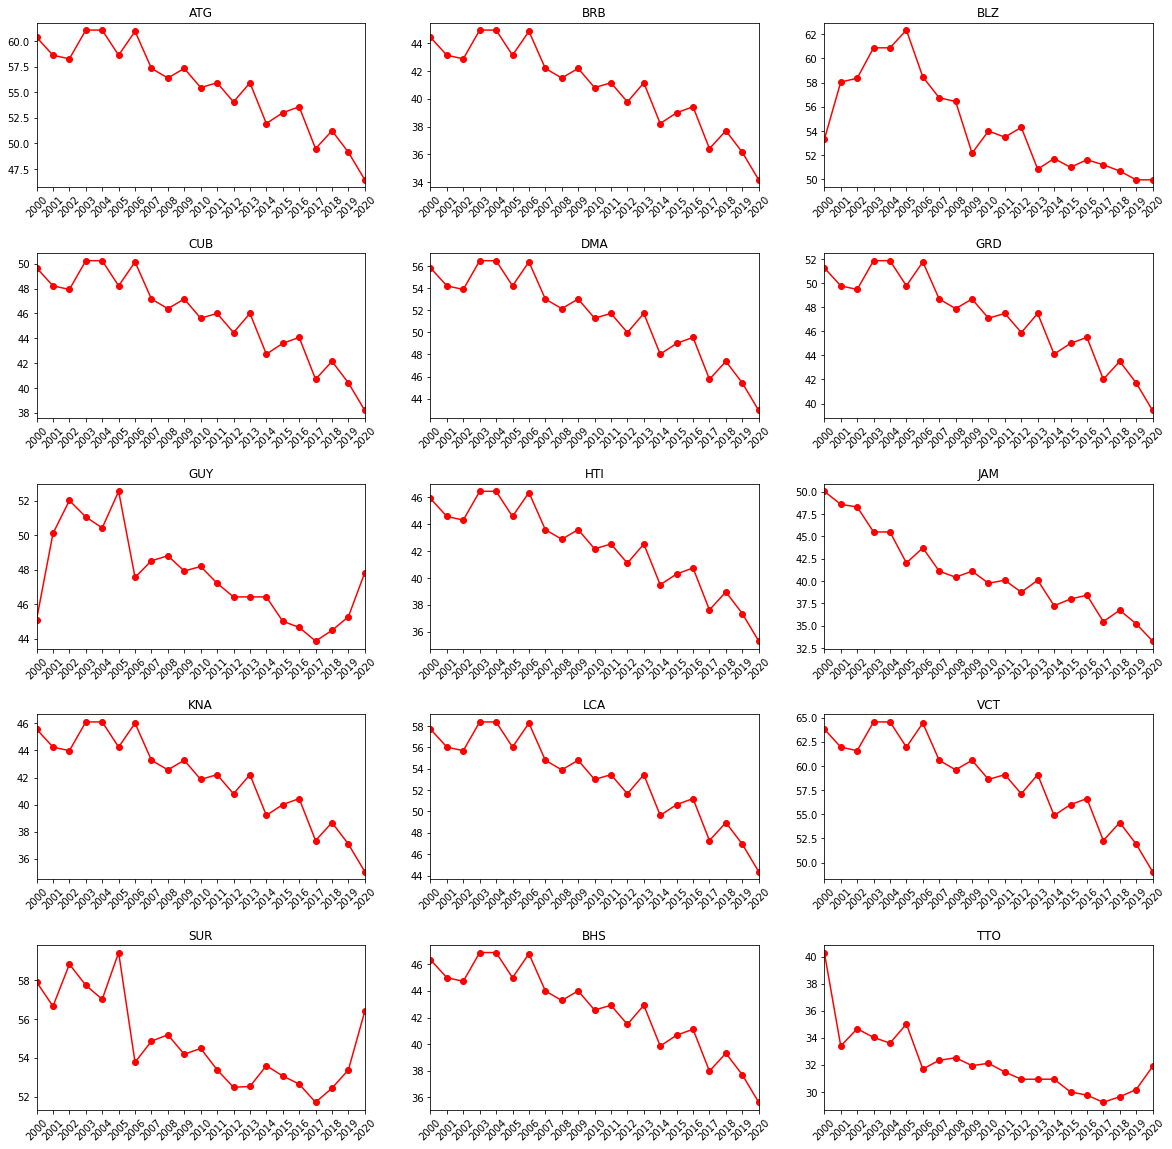

In [47]:
#GRAFICAMOS
num=0
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.4)
for i in paises_nulos4:
    num+=1
    esp=tbl_gini[tbl_gini["Pais_ID"]==i][["Year","GINI"]]
    ax=plt.subplot(5,3,num)
    ax.plot(esp["Year"],esp["GINI"], color="red", marker="o")
    ax.set_title(i)
    plt.xlim("2000","2020")
    plt.xticks(rotation=45)
plt.show()

In [48]:
#CONTAMOS VALORES NULOS
tbl_gini.isnull().sum()

Pais_ID    0
Year       0
GINI       0
dtype: int64